CUSTOMER SEGMENTATION - CLUSTERING & PCA APPLICATION

In this notebook, we will go over how to segment/cluster customers into different groups using K-means clustering. Once we have divided the customers into separate groups, we will use PCA to visualize the distinct clusters. The dataset we will be using is (artificial) data from a bank customer database containing 8950 customers and their credit card information. You can find the dataset here (https://www.kaggle.com/datasets/rruchi/marketing-datacsv). 

First we install necessary packages - the kneed package will be used later in our clustering analysis and fancyimpute will be used for imputing missing values

In [1]:
#INSTALL NECESSARY PACKAGES/LIBRARIES
!pip install kneed
!pip install fancyimpute
!pip install yellowbrick

Load the data into a pandas dataframe.

In [2]:
#LOAD DATA
import pandas as pd
data = pd.read_csv('customer_data.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

We see there are 18 attributes for each observation and all the variables are quantitative, except for customer ID. It will be important to keep in mind which variables are quantitative, as K-means clustering and PCA require using quantitative variables.

In [4]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


The quantitative variables are on wildly different scales, as some of the variables are pure quantities (balance, purchases, payments), while other variables are frequencies/proportions (balance_frequency, oneoff_purchases). We will need to standardize these variables later prior to clustering to ensure that no variables overpower the distance measure that clustering depends on by arbitrary choice of units/scale.

We will check correlations between variables.

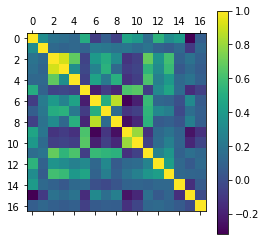

In [5]:
#see correlation between variables
import matplotlib.pyplot as plt

plt.matshow(data.corr())
cb = plt.colorbar()
plt.show()

In [6]:
data.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531283,0.322802,0.398684,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095843,0.065008,0.132569,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356963,0.603264,0.093860,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319724,0.567292,0.048755,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256499,0.384084,0.132172,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303985,0.453238,0.140107,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119788,0.103464,0.003030,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295038,0.243537,-0.030327,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060755,0.085551,0.030073,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.098838,-0.249773,-0.133372


Overall, the variables do not seem to be highly correlated with each other. The purchase variables seem to be highly correlated with each other (purchases, oneoff_purchases, installments_purchases, purchases_trx). Similarly, the cash variables (cash_advance, cash_advance_frequency, cash_advance_trx) are highly correlated with one another.

In [7]:
#ensure no duplicated entries
data['CUST_ID'].nunique()==len(data)

True

In [8]:
#get missing values
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

We see that there are no duplicated entries in the data, but there are some missing values in credit limit and minimum payments. We need to determine how to fill in these missing values, so let's look at the univariate distributions for each of these variables.

In [9]:
data['MINIMUM_PAYMENTS'].describe()

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

<AxesSubplot:ylabel='Frequency'>

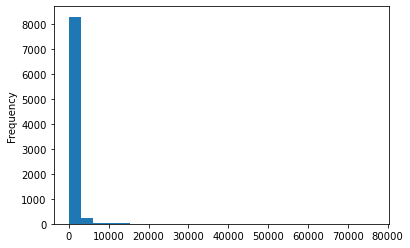

In [10]:
data['MINIMUM_PAYMENTS'].plot.hist(alpha=1,bins=25)

<AxesSubplot:>

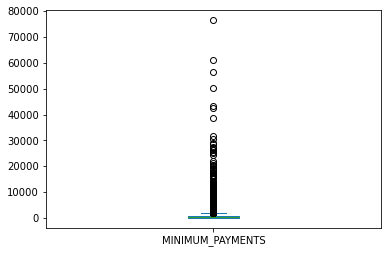

In [11]:
data['MINIMUM_PAYMENTS'].plot.box()

In [12]:
data['CREDIT_LIMIT'].describe()

count     8949.000000
mean      4494.449450
std       3638.815725
min         50.000000
25%       1600.000000
50%       3000.000000
75%       6500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64

<AxesSubplot:ylabel='Frequency'>

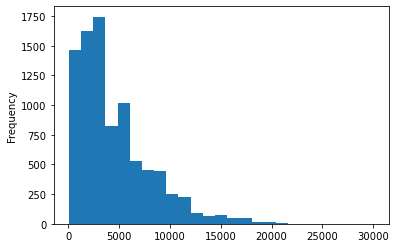

In [13]:
data['CREDIT_LIMIT'].plot.hist(alpha=1,bins=25)

<AxesSubplot:>

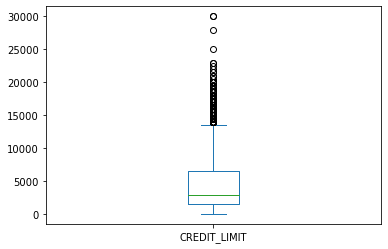

In [14]:
data['CREDIT_LIMIT'].plot.box()

We see that nearly all the values for minimum payments is less than 10000, but there are some extremely large values. Thus, although only about 3% of the observations have missing values, it is probabily not smart to impute these values with the mean, since the mean will be much larger than most of the observations because of the presence of large values.

The distribution of credit limit is heavily skewed right, so the mean of credit limit is also much larger than most of the observations due to some large values of credit limit. Thus, we will not impute these values with the mean.

Instead, we will impute these values using K-nearest neighbors approach, where the average of the k most "similar" observations will be used to fill in missing values. You can find more about different methods for filling in missing data here (https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4).

For each observation with missing values, we will find the 5 most "similar" observations and set the missing value to be the average those values. The KNN approach for imputation may take some time since there are many attributes, so in general we may not want to use KNN for extremely large dimensional data.

We will standardize the data for 3 important reasons:
- KNN imputation is sensitive to the choice of scale/units for each variable.
- K-Means calculates a distance measure between observations, so to prevent any variables from dominating the distance measure due to arbitrary choice of scale, standardizing is important.
- PCA is sensitive to the scale of the features, as each principal component is a linear combination of the original variables that seeks to retain the maximum variance in the original data. Thus, variables with large units will tend to dominate the first PCs as they will likely have the largest variances

In [15]:
#STANDARDIZE DATA PRIOR TO IMPUTATION & CLUSTERING
from sklearn.preprocessing import StandardScaler

data_features = data.drop(columns=['CUST_ID']) #remove customer ID for imputation & rest of analysis

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_features.values)

Now that we have scaled the data, we can now impute the missing values.

In [16]:
from fancyimpute import KNN
data_filled_knn = KNN(k=5).fit_transform(scaled_data)
final_data = pd.DataFrame(data_filled_knn, columns=data_features.columns)
final_data.isnull().sum()

Imputing row 1/8950 with 0 missing, elapsed time: 18.047
Imputing row 101/8950 with 0 missing, elapsed time: 18.049
Imputing row 201/8950 with 0 missing, elapsed time: 18.051
Imputing row 301/8950 with 0 missing, elapsed time: 18.052
Imputing row 401/8950 with 0 missing, elapsed time: 18.053
Imputing row 501/8950 with 0 missing, elapsed time: 18.054
Imputing row 601/8950 with 0 missing, elapsed time: 18.055
Imputing row 701/8950 with 0 missing, elapsed time: 18.055
Imputing row 801/8950 with 0 missing, elapsed time: 18.057
Imputing row 901/8950 with 0 missing, elapsed time: 18.057
Imputing row 1001/8950 with 0 missing, elapsed time: 18.060
Imputing row 1101/8950 with 0 missing, elapsed time: 18.062
Imputing row 1201/8950 with 0 missing, elapsed time: 18.063
Imputing row 1301/8950 with 0 missing, elapsed time: 18.064
Imputing row 1401/8950 with 0 missing, elapsed time: 18.065
Imputing row 1501/8950 with 0 missing, elapsed time: 18.065
Imputing row 1601/8950 with 0 missing, elapsed time:

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

We have filled in all missing values. Let's visualize the data on the first 2 PCs to see if there is any noticable cluster patterns prior to performing formal clustering analysis.

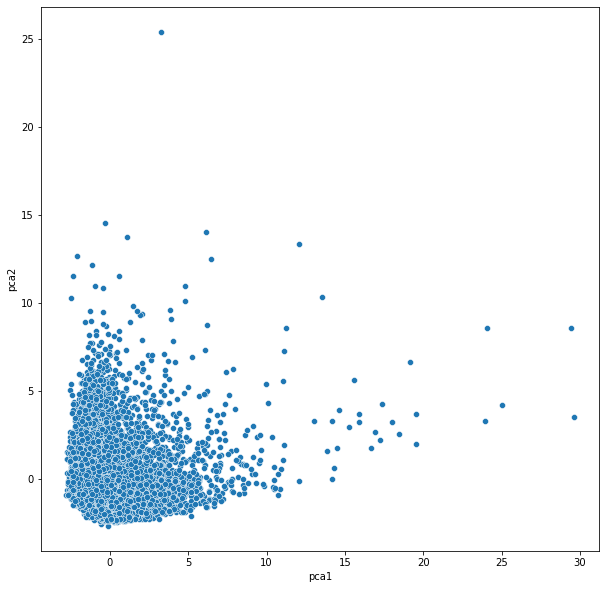

In [17]:
from sklearn.decomposition import PCA

# PCA w/ 2 components
pca_2d = PCA(n_components=2)
pc_2d = pca_2d.fit_transform(final_data)
# create dataframe
pca_2d_df = pd.DataFrame(data = pc_2d, columns =['pca1','pca2'])

import seaborn as sns
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", data = pca_2d_df)
plt.show()

There does not seem to be any clear partitioning in the data, a vast majority of the data seems to be within the range of 0-5 for both pca1 and pca2. 

We will proceed with K-means clustering.

K-Means clustering algorithm iterates as follows:

1) Initialize k centroids.

2) Repeat the following until stopping criteria satisfied - predetermined number of iterations or until cluster labels stop changing.

    - Assign each point to the label of the centroid it is closest to
    - Move each centroid to the mean of all of its labeled points
    
More information about K-Means clustering can be found here (https://stanford.edu/~cpiech/cs221/handouts/kmeans.html).

However, at this stage we don't know the number of optimal clusters to partition our data.

- Thus, we will perform k-means clustering for a range of values of k, in this case 1-20
- We will select the k-value where Within Cluster Sum of Squares (WCSS) seems to start decreasing at a slower rate, a.k.a the elbow method

Additionally, the result produced by K-Means can vary a lot depending on how the centroids are initialized, as an unlucky initialization can lead to less than ideal clustering. 

- For each value of k, we will perform multiple iterations of the algorithm (n_init=10) to reduce the chance of landing on a local optimum
- We will use k-means++ method to initialize centroids -> first centroid is randomly initialized, and then the probability of any given point in the variable space to be selected as the location of the next centroid is proportional to the square of the point's distance to the closest existing centroid. The end result is that centroids are most likely to be spread apart.

More information about different centroid initialization methods can be found here (https://www.kdnuggets.com/2020/06/centroid-initialization-k-means-clustering.html).

C:\Users\jimin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\jimin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\jimin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\jimin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\jimin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\jimin\anaconda3\lib\site-packages\sklearn

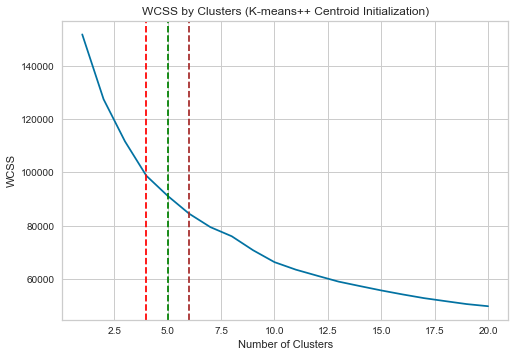

In [35]:
#iterate through different number of clusters to find ideal value of K
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 21):
    kmeans = KMeans(init='k-means++',
                    n_clusters=i,
                    n_init=10,
                    max_iter=300,
                    algorithm='auto')
    kmeans.fit(final_data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,21), wcss)
plt.title('WCSS by Clusters (K-means++ Centroid Initialization)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.axvline(x=4, color='red', linestyle='dashed')
plt.axvline(x=5, color='green', linestyle='dashed')
plt.axvline(x=6, color='brown', linestyle='dashed')
plt.show()

Although it is hard to tell, it seems that WCSS starts to decrease at a slower rate starting at 4 or 5 clusters.

In [29]:
from kneed import KneeLocator
kl = KneeLocator(
    range(1, 21), wcss, curve="convex", direction="decreasing"
)

kl.elbow

6

The kneed package suggests otherwise - it suggests that the elbow point in the plot is at 6 clusters.

Silhouette scores are also another metric for evaluating the quality of a clustering solution. Silhouette scores can range from [-1, 1] where numbers close to 1 indicate clearly distinguishable clusters, values close to 0 indicate no cluster structure is evident, and values close to -1 indicate cluster assignments are incorrect.

C:\Users\jimin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\jimin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\jimin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\jimin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\jimin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\jimin\anaconda3\lib\site-packages\sklearn

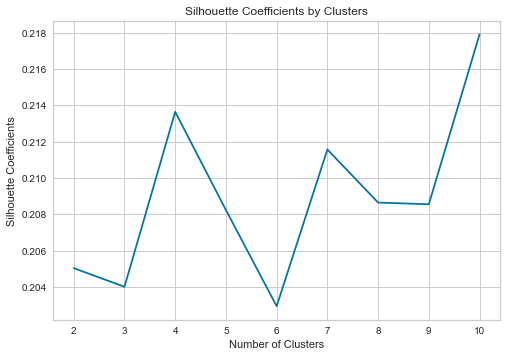

In [36]:
from sklearn.metrics import silhouette_score
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(init='k-means++',
                    n_clusters=i,
                    n_init=10,
                    max_iter=300,
                    algorithm='auto')
    kmeans.fit(final_data)
    score = silhouette_score(final_data, kmeans.labels_)
    silhouette_coefficients.append(score)
    
plt.plot(range(2,11), silhouette_coefficients)
plt.title('Silhouette Coefficients by Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficients')
plt.show()

In [37]:
silhouette_coefficients

[0.20504114647291768,
 0.20401562568491327,
 0.21364551604153326,
 0.20824006956115088,
 0.2029462840446625,
 0.21156954056493293,
 0.20865087138480057,
 0.20855629659194114,
 0.2179038524818942]

In [38]:
max(silhouette_coefficients)-min(silhouette_coefficients)

0.0149575684372317

Silhouette plot indicates that the clustering solution with K=4 has a relatively high silhoutte score.
However, the scale of the plot seems to exaggerate the small differences in silhouette coefficient values, as they are all within 0.06 of each other. 

We will proceed with 4 clusters as it has a relatively high silhouette coefficient and it seems to be around where WCSS starts to decrease at a slower rate. Additionally, we want to minimize the number of clusters if we can to make interpreting our clustering solution easier.

In [39]:
#Proceed with 4 clusters
kmeans_sol = KMeans(init='k-means++',
                    n_clusters=4,
                    n_init=10,
                    max_iter=300,
                    algorithm='auto')
kmeans_sol.fit(final_data)

C:\Users\jimin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='auto', n_clusters=4, n_init=10)

Inverse transform the scaled data back to original units

In [83]:
# Perform inverse transformation
inverted_data = scaler.inverse_transform(final_data.values)
final_data_inv = pd.DataFrame(inverted_data, columns = final_data.columns)
final_data_inv.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,1.666670e-01,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,-5.551115e-17,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000e+00,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,8.333300e-02,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,206.079344,0.000000,12.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,8.333300e-02,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0


Add the cluster labels to dataset so we can visualize cluster groups.

In [76]:
#add cluster assignments to dataset
final_data_inv["CLUSTER_NUMBER"] = pd.Series(kmeans_sol.labels_).values

In [77]:
final_data_inv["CLUSTER_NUMBER"].value_counts()

0    3982
3    3369
2    1198
1     401
Name: CLUSTER_NUMBER, dtype: int64

We see that there are cluster 0 is the largest cluster with 3982 observations, whereas cluster 1 is much smaller compared to the other clusters with only 401 observations.

In [78]:
by_cluster = final_data_inv.groupby("CLUSTER_NUMBER")

In [79]:
by_cluster.mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CLUSTER_NUMBER,,,,,,,,,,,,,,,,,
0,1010.710612,0.789823,270.140050,209.669023,60.737647,595.552160,0.170768,0.086193,0.081273,0.114744,2.123305,2.915871,3276.092257,974.530132,548.449884,0.078146,11.447263
1,3568.229573,0.987070,7763.389601,5154.847307,2610.038554,651.886567,0.945557,0.740475,0.785910,0.070011,2.074813,89.683292,9725.685786,7369.283900,1997.524183,0.291319,11.950125
2,4602.462714,0.968415,501.896219,320.373681,181.607404,4520.724309,0.287731,0.138934,0.185516,0.484526,14.284641,7.661102,7546.957050,3481.145990,2013.425932,0.034859,11.387312
3,900.204708,0.935151,1243.275358,598.548822,645.000588,211.390181,0.885951,0.298428,0.712582,0.042771,0.794598,22.232413,4225.206368,1337.359083,640.348182,0.268919,11.594835


We will plot the distribution of each variable by cluster group to see on which attributes do the clusters differ.

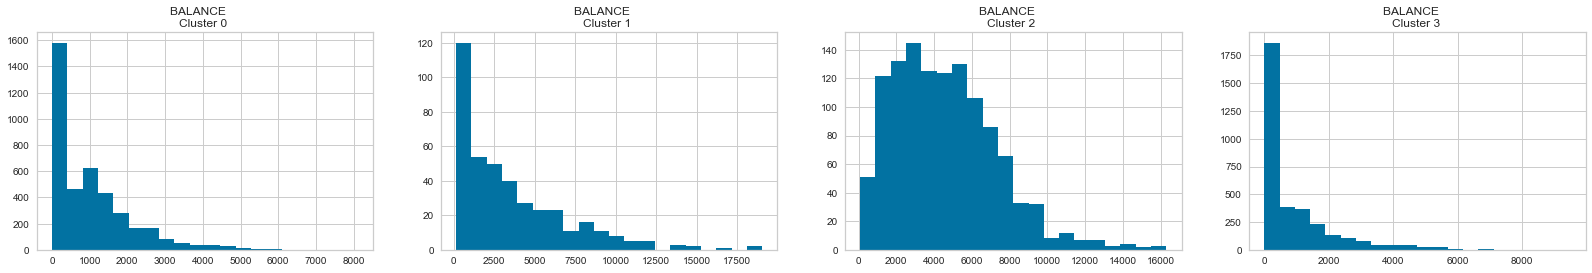

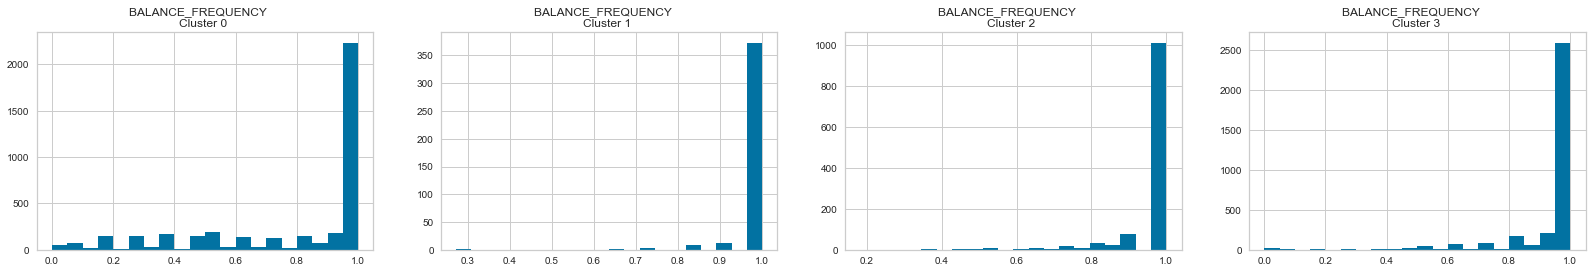

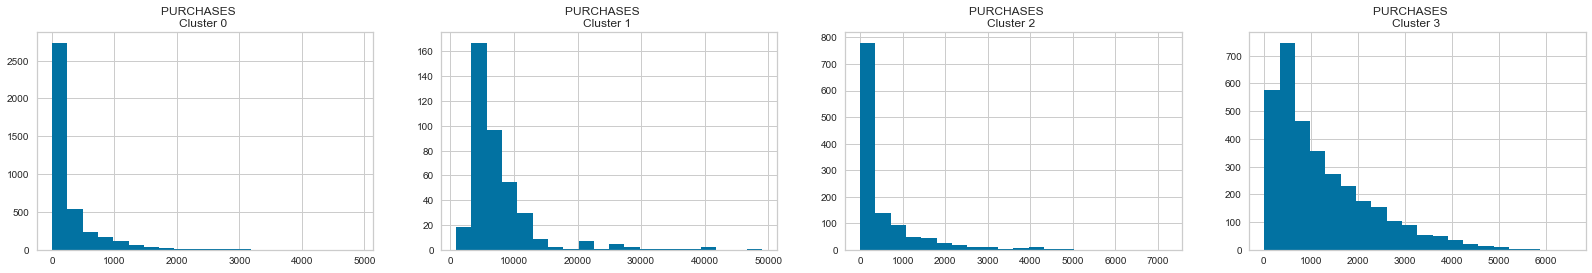

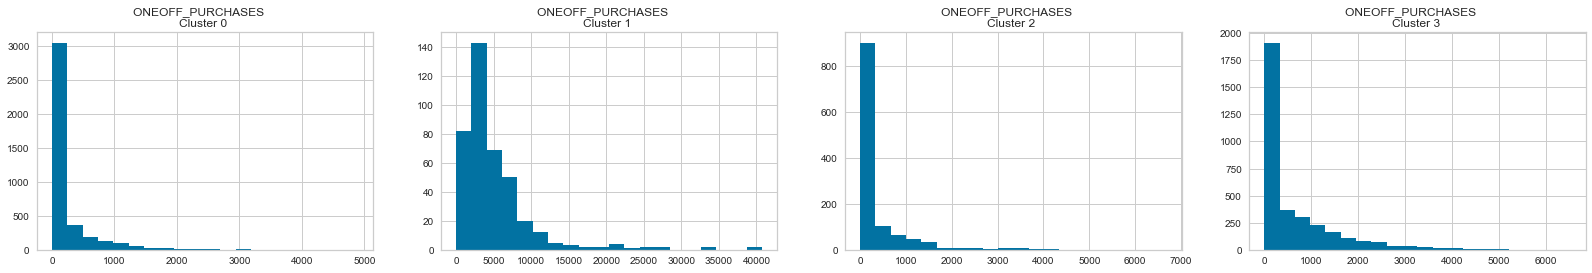

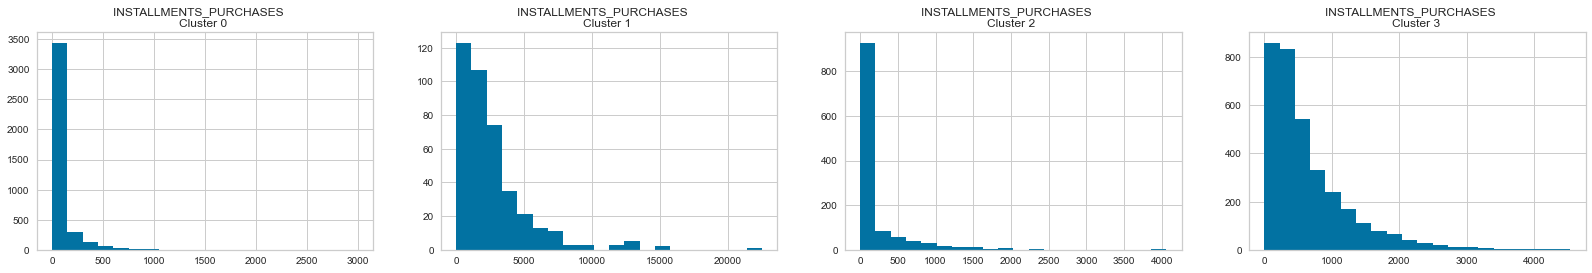

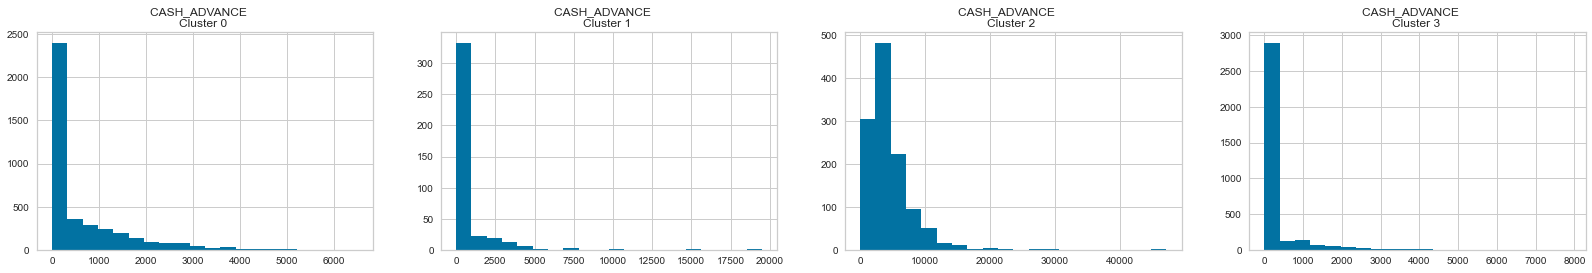

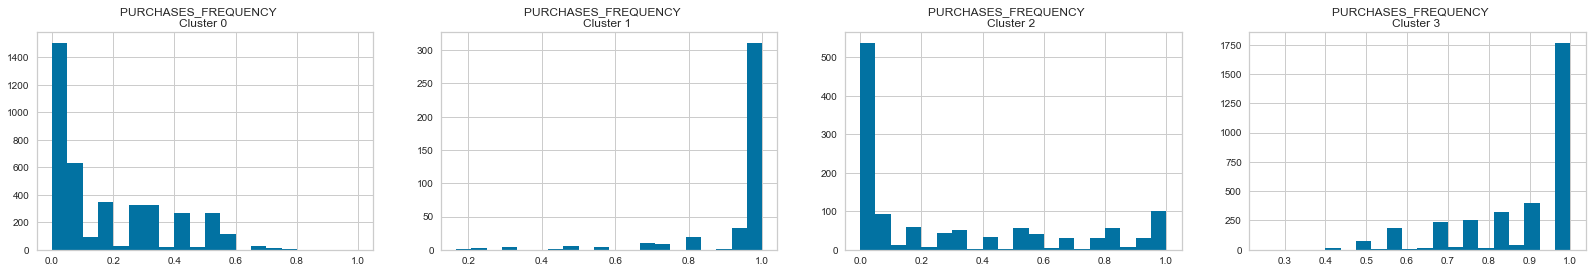

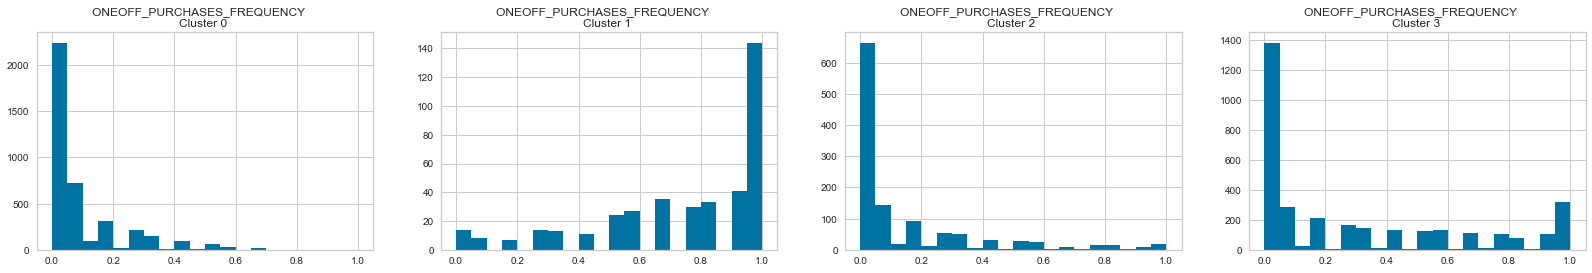

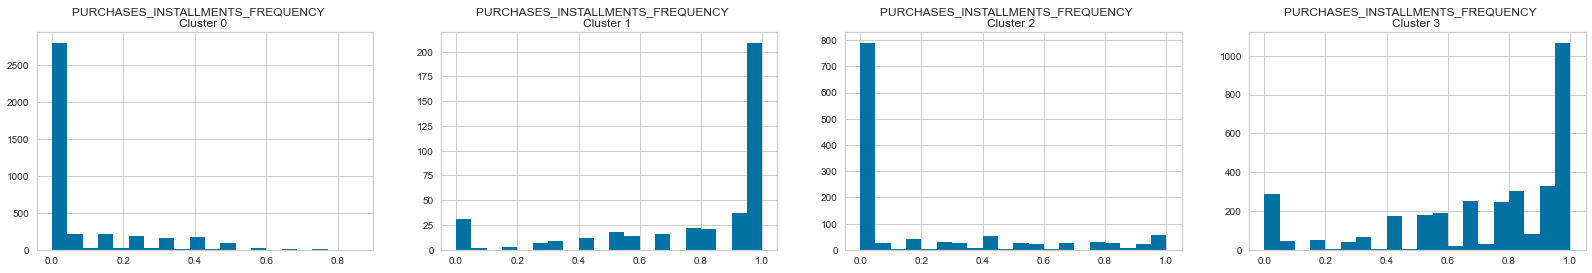

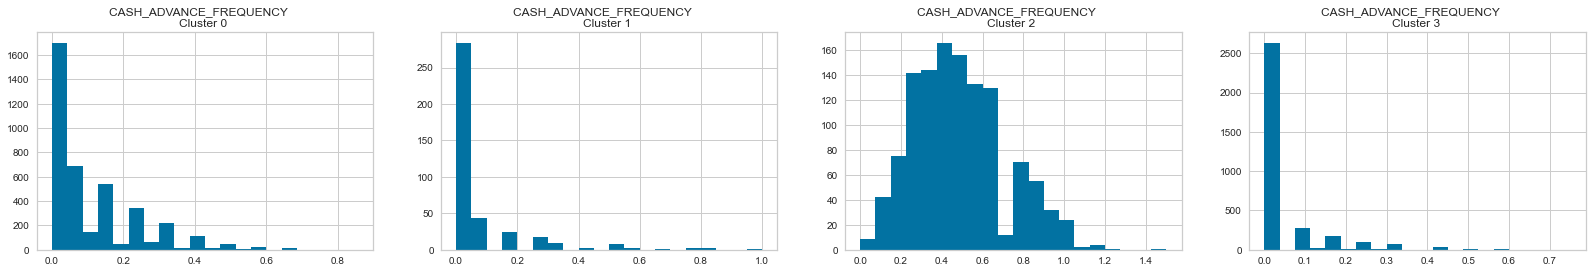

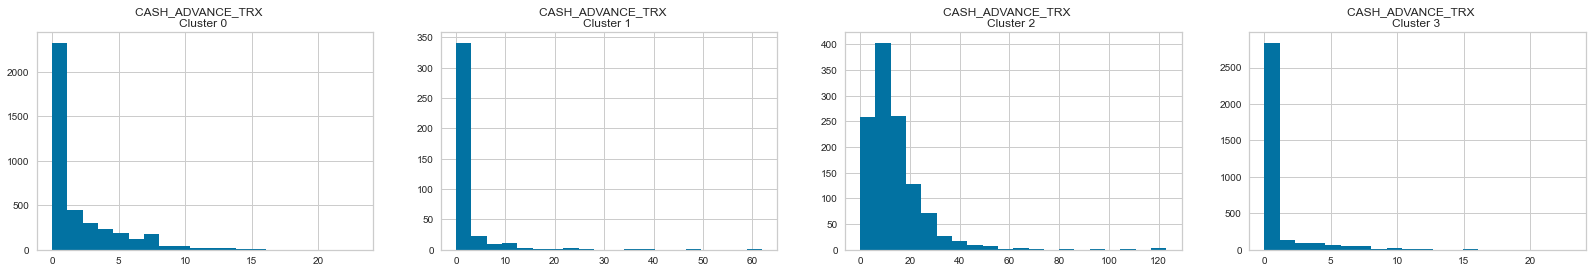

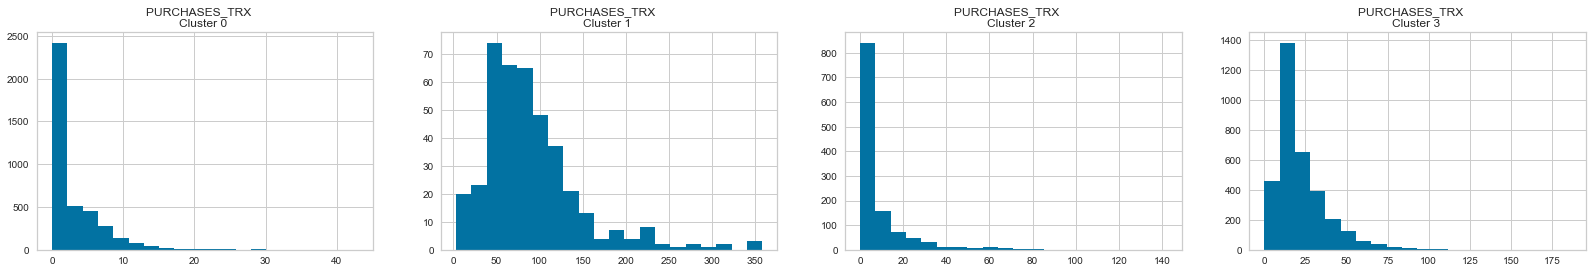

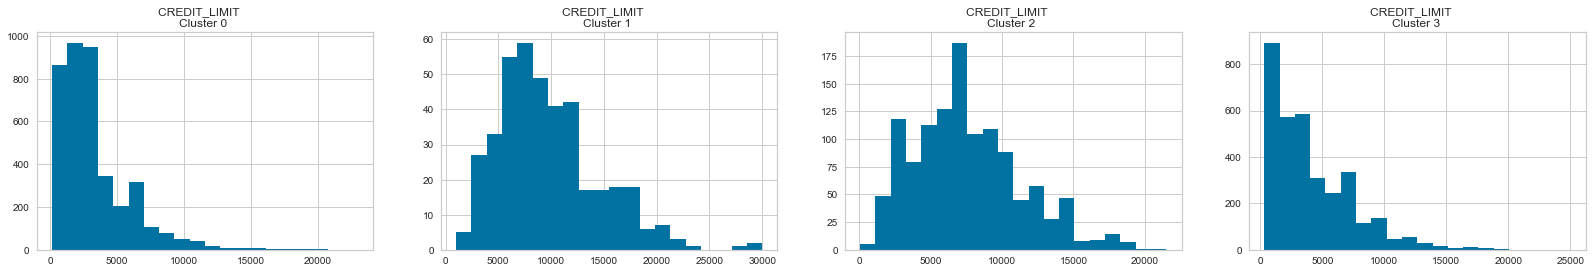

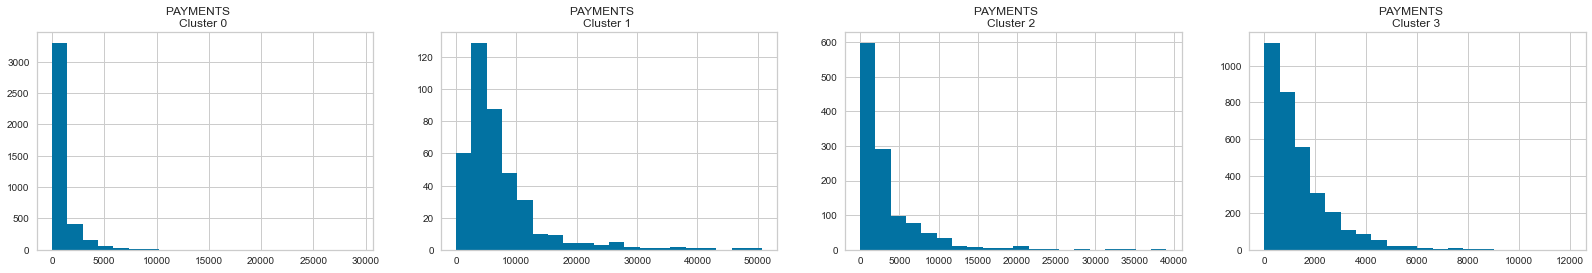

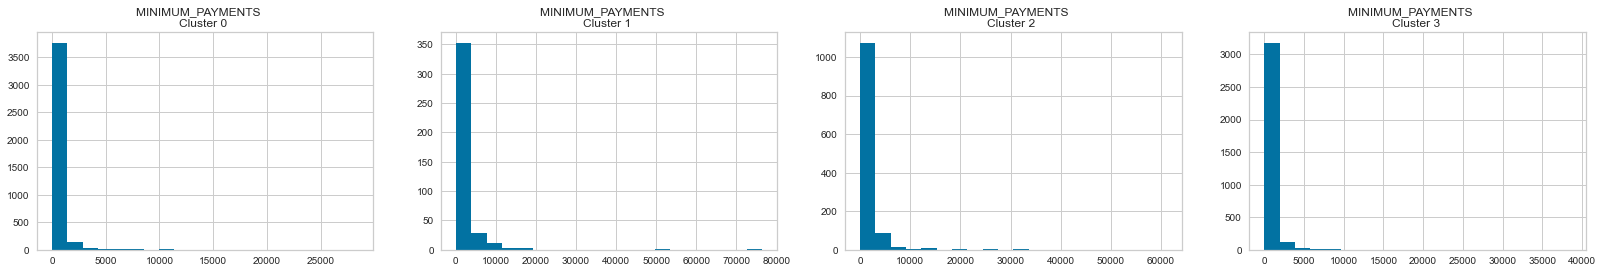

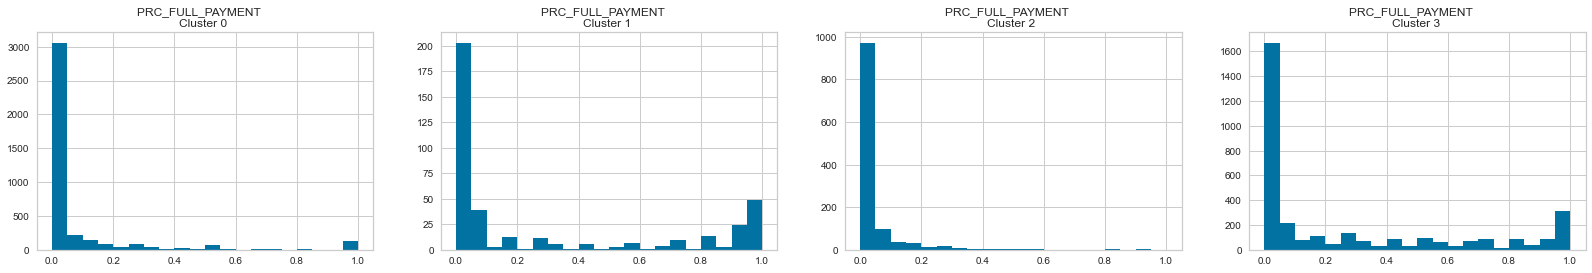

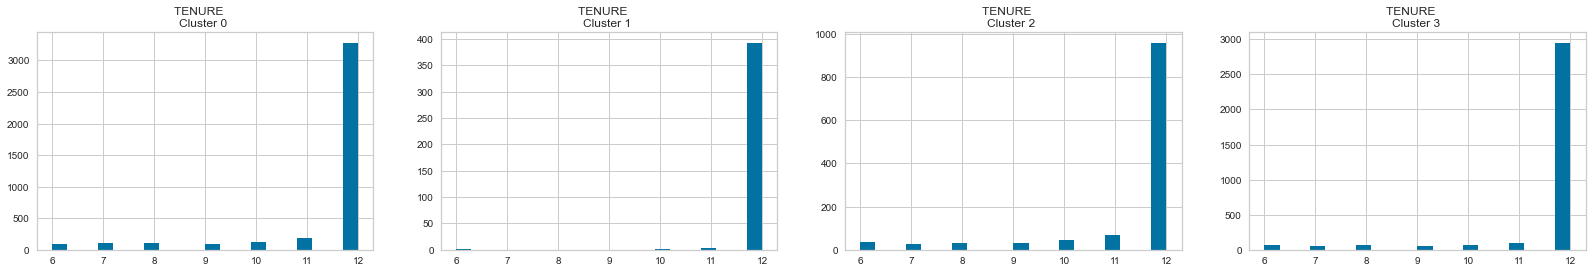

In [82]:
# Plot the histogram of various clusters
for i in final_data.columns:
  plt.figure(figsize = (35, 4))
  for j in range(4):
    plt.subplot(1,5,j+1)
    cluster = final_data_inv[final_data_inv['CLUSTER_NUMBER'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

Cluster 2 -> high balance, low purchases, highest cash in advance, high credit limit, lowest percent of full payment
- these customers are not very active credit card users considering their remaining balance. They have large cash advance which means they may have additional fees/interest, but they seem to pay cash advance back frequently and have a high credit limit, so they seem reliable to lend credit to 

Cluster 0 -> low balance, low purchases, low credit limit, low percent of full payment
- not very active with credit card usage, have lowest credit limit and have the 2nd to lowest percentage of full payment paid, so they aren't very active purchasers nor are they reliable in paying back their debt 

Cluster 1 -> high balance, highest purchases by a lot (mostly one-time), relatively little cash in advance, highest credit limit, highest percent of full payment
- these customers are most active in credit card usage, but rarely have to take cash out in advance and they have high credit limit, so they are reliable in paying back their borrowed money

Cluster 3 -> lowest balance, lots of purchases relative to balance (split even between one-time and installments), low cash advance, low credit limit, high percent of full payment
- although these customers have low balance, they are highly active in credit card usage. They take out fairly little in cash advance and have high percent of full payment, so they seem to be reliable in paying back debt

We will perform PCA and extract the first 2 principal components to visualize the clusters.

In [90]:
from sklearn.decomposition import PCA

# PCA w/ 2 components
pca_2d = PCA(n_components=2)
pc_2d = pca_2d.fit_transform(final_data)
# create dataframe
pca_2d_df = pd.DataFrame(data = pc_2d, columns =['pca1','pca2'])
# add cluster labels to dataframe
pca_2d_df = pd.concat([pca_2d_df, pd.DataFrame({'cluster':kmeans_sol.labels_})], axis = 1)
pca_2d_df.head()

,pca1,pca2,cluster
0,-1.682839,-1.072143,0
1,-1.135050,2.509203,2
2,0.969946,-0.381969,3
3,-0.890700,-0.002426,0
4,-1.599345,-0.683487,0


In [91]:
#PCA WEIGHTS
pca_2d.components_

array([[ 0.10153685,  0.12054651,  0.41155805,  0.34634102,  0.3367381 ,
        -0.02294258,  0.32131121,  0.29456415,  0.27454223, -0.08869886,
        -0.04825568,  0.3906059 ,  0.2118778 ,  0.26639849,  0.06248872,
         0.13195539,  0.08111045],
       [ 0.40373771,  0.13179999,  0.04028585,  0.06224558, -0.01915997,
         0.4392761 , -0.19102951, -0.01814314, -0.17888713,  0.43440737,
         0.41991118, -0.01999133,  0.23824818,  0.25698693,  0.16638438,
        -0.18982601, -0.00419007]])

Above we have the components of the first 2 PCAs - each component has 17 weights, one for each variable.

From these numerical components, we can make some inferences about what high values in either of the PCs mean.

Observations with high values for PCA 1 -> large number of purchases, purchase transactions.

Observations with high values for PCA 2 -> large outstanding balance, cash in advance, low purchase frequency, low percent of full payment.

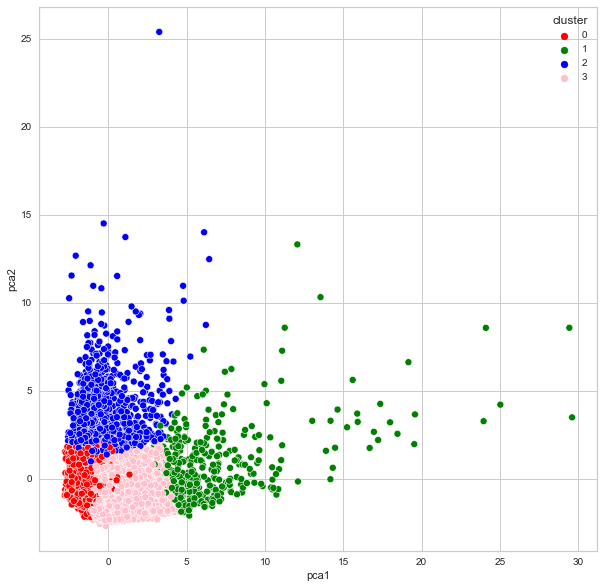

In [92]:
import seaborn as sns
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_2d_df, palette =['red','green','blue','pink'])
plt.show()